In [1]:
import numpy as np
from scipy import stats, signal
import matplotlib.pyplot as plt

# DFT in osnove naključnih procesov

:::{admonition} Naloga
:class: warning

Z uporabo generatorja signalov in zajemnega sistema Arduino zajamite naključni signal s parametri (srednjo vrednostjo $m$, amplitudo $A$) iz podatkov naloge. Zajem podatkov izvedite tako, da boste pri pretvorbi zajetega signala v frekvnečno domeno dobili spekter na podanem frekvenčnem območju $[0, f_k]$ ter z ločljivostjo v frekvenčni domeni $\Delta f$ iz podatkov naloge.

LabView program za zajem signalov lahko prenesete v obliki {download}`zip arhiva<./data/03/labview_zajem.zip>`.

Pripravite kratko poročilo v okolju Jupyter Notebook *(od 3 do 10 celic s kodo)*, v katerem naj bodo razvidni podatki naloge ter prikaz in kratek komentar naslednjih lastnosti zajetega signala:
* zajeto frekvenčno območje in frekvenčna ločljivost,
* ocena gostote porazdelitve verjetnosti vrednosti $p(x)$ zajetega signala $x(t)$,
* enostranska ter dvostranska avtospektralna gostota moči, $G_{XX}$ in $S_{XX}$,
* prvi štirje *spektralni* momenti ($m_0$, $m_1$, $m_2$, $m_3$) zajetega signala.

**Dodatek**: 
* Ovrednotite in komentirajte **stacionarnost** ter **ergodičnost** zgoraj generiranega naključnega signala (po potrebi zajamite dodatne signale, ki jih za to potrebujete).
* Numerično generirajte in komentirajte primera **nestacionarnega gaussovega** ter **stacionarnega ne-gaussovega** naključnega signala (glejte na primer [pyExSi](https://pypi.org/project/pyExSi/)).

Poročilo oddajte tudi v `.pdf` obliki (glejte [navodila za oddajo domačih nalog](intro-domace-naloge)).

:::

---

## Diskretna Fourierova transformacija

Računamo Fourierovo transformacijo *diskretnega signala*, $x_n = x(n\,\Delta t)$. Kadar imamo končno mnogo vzorčenih podatkov ($N$) in gre $n=[0,1,\dots,N-1]$, uporabimo diskretno Fourierovo transformacijo (DFT).

:::{note}

**Diskretna Fourierova transformacija**:

$$
X_k = \sum_{n=0}^{N-1} x_n\,e^{-\mathrm{i}\,2\pi\,k\,n/N}.
$$

Velja $X_k=X(k/(N\,\Delta t))$. 

Ker je DFT periodična z $1/\Delta t$ ($X_k=X_{k+N}$), je treba izračunati samo $N$ členov.

Modul [`numpy.fft`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq) izračuna $X_k$ za diskretne frekvenčne točke pri $k \in [-N/2, \dots, 0,\dots\,N/2-1]$ (v primeru sodega števila točk $N$).


:::

:::{admonition} Primer 1
:class: seealso

Poglejmo diskretizacijo frekvenčnega vektorja pri DFT signala, vzorčenega pri časih: $t = [0, 1, 2, \dots, 9] s$:

:::

In [2]:
t = np.arange(0, 10)
delta_t = t[1] - t[0]
n = len(t)
delta_t, n

(1, 10)

In [3]:
np.fft.fftfreq(len(t), t[1]-t[0])

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

In [4]:
np.fft.rfftfreq(len(t), t[1]-t[0])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

---

## Osnove naključnih procesov

Procese, ki jih ne moremo obravnavati kot deterministične, pogosto modeliramo kot **naključne procese**.

Za te je značilno, da njijovih dejanjskih vrednosti v času $x(t)$ ne moremo natančno predvideti, lahko pa z določeno verjetnostjo *sklepamo o porazdelitvi njihovih vrednost*. Tako definiramo funkcijo *gostote porazdelitve verjetnost*, $p(x)$, ki podaja verjetnost, da se bo v vzorcu naključne spremenljivke $x(t)$ pojavila določena vrednost $x$.

Lastnosti takih signalov je pogosto smiselno obravnavati v frekvenčni domeni.

:::{admonition} Primer 2
:class: seealso

Normalno porazdeljena naključna spremenljivka $x$ z $N=1000$ vzorci, srednjo vrednostjo $\mu = 5$ in standardno deviacijo $\sigma = 2$ predstavlja realizacijo N ponovitev naključnega dogodka. 

Ocenimo prva dva centralna momenta funkcije gostote verjetnosti ($n = [1, 2]$):

$$
\sigma^n(t)= E[(x(t)-\mu_x)^n] = \int_{-\infty}^{+\infty} (x-\mu_x)^n\, p(x)\, \textrm{d} x
$$


:::

In [5]:
N = 1000
mu = 5
sigma = 2

In [6]:
x = np.random.randn(N)*sigma + mu

In [7]:
x_center = x - np.mean(x)

In [8]:
s_1 = np.mean(x_center)
s_1

7.105427357601002e-18

In [9]:
s_2 = np.mean((x_center)**2)
s_2

3.71688658934119

Bolj splošen [generator naključnih vrednosti v Numpy](https://numpy.org/doc/stable/reference/random/generator.html):

In [10]:
rng = np.random.default_rng()
y = rng.normal(loc=mu, scale=sigma, size=N)

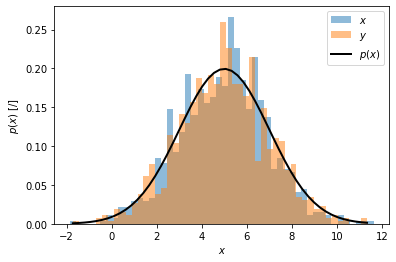

In [11]:
hist, bins, _ = plt.hist(x, bins=50, alpha=0.5, density=True, label='$x$');
hist, bins, _ = plt.hist(y, bins=50, alpha=0.5, density=True, label='$y$');
plt.plot(bins, stats.norm.pdf(bins, mu, sigma), 'k', lw=2, label='$p(x)$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$p(x)$ [/]');
plt.show()

Porazdelitev verjetnosti ni nujno normalna (Gaussova):

In [12]:
z = rng.weibull(a=2.5, size=N)

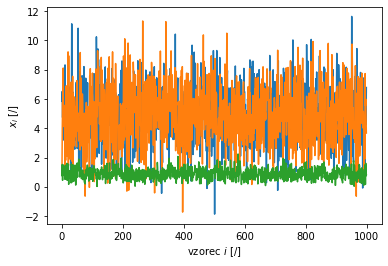

In [13]:
plt.plot(x, label='$x$')
plt.plot(y, label='$y$')
plt.plot(z, label='$z$')
plt.xlabel('vzorec $i$ [/]')
plt.ylabel('$x_i$ [/]');

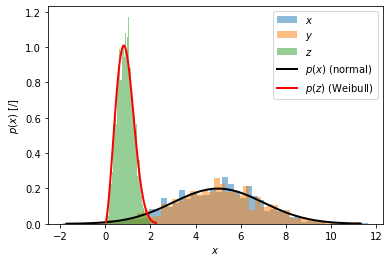

In [14]:
hist, bins, _ = plt.hist(x, bins=50, alpha=0.5, density=True, label='$x$');
hist, bins, _ = plt.hist(y, bins=50, alpha=0.5, density=True, label='$y$');
hist_w, bins_w, _ = plt.hist(z, bins=50, alpha=0.5, density=True, label='$z$');
plt.plot(bins, stats.norm.pdf(bins, mu, sigma), 'k', lw=2, label='$p(x)$ (normal)')
plt.plot(bins_w, stats.weibull_min.pdf(bins_w, 2.5), 'r', lw=2, label='$p(z)$ (Weibull)')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$p(x)$ [/]');
plt.show()

:::{note}
Naključni proces $x(t)$ je **stacionaren**, če so srednja vrednost in kovariančne funkcije procesa časovno neodvisne.

Naključni proces $x(t)$ je **ergodičen**, če so statistične lastnosti nižjega reda ene same realizacije procesa v času ($x(t)$) enake statističnim lastnostim ansambla več realizacij dogodka $x_k(t)$. Pravimo, da je *posamezna realizacija procesa reprezentativna*.
:::

:::{admonition} Primer 3
:class: seealso

Opazujemo naključni proces $x(t)$ z normalno porazdelitvijo verjetnosti ($\mu = -4$,  $\sigma = 1$), definiran v 10 časovnih točkah $t = [0, 1, \dots, 9]$. Posnamemo ansambel $N=50$ realizacij naključnega pocesa.

Opazujmo razvoj srednje vrednosti in variance signala v času, $\mu_x(t)$ in $\sigma^2_x(t)$.

:::

In [15]:
t = np.arange(10)
N = 50
mu = -4
sigma = 1

ansambel = []
for ponovitev in range(N):
    ansambel.append(rng.normal(loc=mu, scale=sigma, size=len(t)))
ansambel = np.array(ansambel)

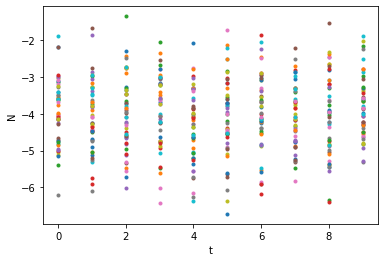

In [16]:
for p in ansambel:
    plt.plot(t, p, '.')
plt.xlabel('t')
plt.ylabel('N');

In [17]:
mu_t = np.mean(ansambel, axis=0)
var_t = np.mean((ansambel-np.mean(ansambel, axis=0))**2, axis=0)

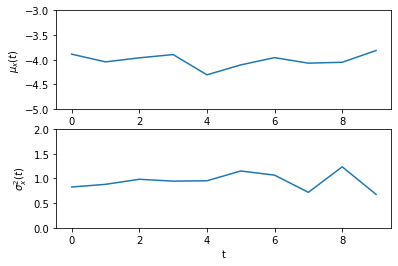

In [18]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, mu_t)
ax[0].set_ylim(mu-sigma, mu+sigma)
ax[0].set_xlabel('t')
ax[0].set_ylabel('$\mu_x(t)$');

ax[1].plot(t, var_t)
ax[1].set_ylim(sigma-sigma, sigma+sigma)
ax[1].set_xlabel('t')
ax[1].set_ylabel('$\sigma^2_x(t)$');

:::{note}

**Ato-korelacijska** funkcija $R_{xx}(\tau)$ je definirana z:

$$R_{xx}(\tau) = E[ x_k(t) \, x_k(t+\tau)]$$

in je enaka avto-kovariančni funkciji v primeru procesa z ničelno srednjo vrednostjo.
:::

:::{note}

Avto-spektralna gostota moči (PSD, *Power Spectral Density*) je Fourierova transformacija avtokorelacijske funkcije signala:

$$S_{xx}(f) = \mathcal{F}\big(R_{xx}(\tau)\big)$$

Za ergodičen proces jo lahko izračunamo kot:

$$S_{xx}(f) = \frac{1}{T}\, X^*(f) \, X(f)\qquad\text{PSD}.$$

:::

:::{admonition} Primer 4
:class: seealso

Opazujemo naključni proces $a(t)$, definiran z:

$$a(t) = \sin(10 \, \pi \, t) + n(t),$$

kjer je $n(t)$ naključni šum z normalno porazdelitivjo ($\mu=0$, $\sigma=0.5$).

Opazujmo avtokorelacijsko funkcijo $R_{aa}(t)$ in gostoto spektralne moči $S_{aa}(f)$ signala $a(t)$.

:::

In [19]:
f = 5
T = 1
fs = 100
t = np.arange(fs*T) / fs
a = np.sin(2*np.pi*f*t) + np.random.randn(len(t))*0.5

In [20]:
R_aa = np.correlate(a-np.mean(a), a-np.mean(a), mode='full') / np.std(a)**2 / len(a)

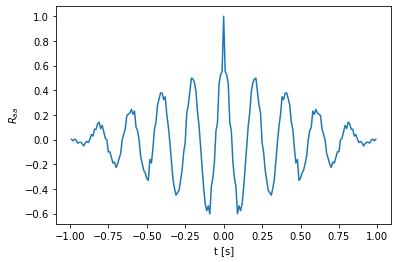

In [20]:
plt.plot(np.hstack([-t[::-1], t[1:]]), R_aa)
plt.xlabel('t [s]')
plt.ylabel('$R_{aa}$');

In [21]:
R_aa = R_aa[-len(a):]

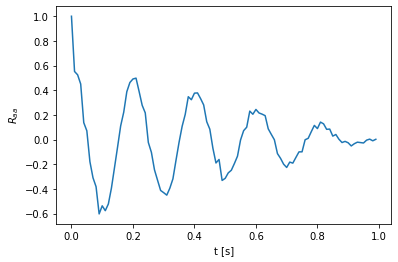

In [21]:
plt.plot(t, R_aa)
plt.xlabel('t [s]')
plt.ylabel('$R_{aa}$');

In [22]:
S_aa_ = np.fft.rfft(R_aa) / len(R_aa) * 2 * T

A = np.fft.rfft(a) / len(a)
freq = np.fft.rfftfreq(len(a), 1/fs)
S_aa = np.conj(A) * A  * 2 * T

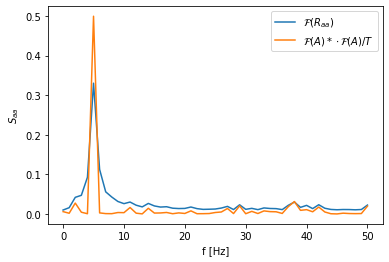

In [23]:
plt.plot(freq, np.abs(S_aa_), label='$\mathcal{F}(R_{aa})$')
plt.plot(freq, np.abs(S_aa), label='$\mathcal{F}(A)* \cdot \mathcal{F}(A) / T$')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel('$S_{aa}$');

Parsevalov teorem:

In [24]:
a.var(), np.trapz(np.abs(S_aa), freq)

(0.7897720437819653, 0.7927467938003039)